# BlueBerry Winery - Wine Quality Prediction with Machine Learning

Develop models to determine the quality of the wines produced based on their chemical composition

## Load libraries and data

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

In [75]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
wines = pd.read_csv('wines_combined.csv')
display(wines)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


## Data Wrangling 2

### 1. Change column headings to snake_case and use IUPAC standard spelling ('sulfates')

In [76]:
display(wines)
wines = wines.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid": "citric_acid", "residual sugar" : "residual_sugar", "free sulfur dioxide" : "free_sulfur_dioxide", "total sulfur dioxide" : "total_sulfur_dioxide", "sulphates" : "sulfates"})
display(wines)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


### 2. Drop old index values form red/white datasets

In [77]:
wines = wines.drop(['Unnamed: 0'], axis=1)

In [78]:
display(wines)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


### 3. Drop duplicates

In [79]:
# First, check for duplicates using duplicated() ## FIXED now that second index removed
# use the value counts of duplicated() to show how many items are duplicated
display('Counts of duplicated items:', wines.duplicated().value_counts())

#drop dupliactes and reset index
wines_clean = wines.drop_duplicates(keep='last').reset_index()
display(wines_clean)

'Counts of duplicated items:'

False    5320
True     1177
dtype: int64

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color
0,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
1,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
2,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
3,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
5316,6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
5317,6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
5318,6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


### 3.5 Drop wines outside legal limits

In [80]:
#total_sulfur_dioxide_max =  400  ## including ‘colheita tardia’ https://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32019R0934&rid=2
## decided not to do this as only one wine falls into this, if indeed sweeter, late-harvest wines are included

### 4. Check and change data types

In [81]:
wines_clean.dtypes

index                     int64
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulfates                float64
alcohol                 float64
quality                   int64
quality_label            object
color                    object
dtype: object

In [82]:
# cast columns to Categorical (pandas) data type:
# color, unordered
wines_clean['color'] = pd.Categorical(wines_clean['color'],
ordered=False)

# quality_label, ordered low to high
wines_clean['quality_label'] = pd.Categorical(wines_clean['quality_label'],
categories=['low', 'medium', 'high'], ordered=True)

wines_clean.dtypes

#display(wines_clean)

index                      int64
fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulfates                 float64
alcohol                  float64
quality                    int64
quality_label           category
color                   category
dtype: object

### 5. Calculate skewness and kurtosis

In [83]:
print((wines_clean.select_dtypes(include=['int64', 'float64'])).astype(float).skew())

index                   0.050375
fixed_acidity           1.650417
volatile_acidity        1.504557
citric_acid             0.484309
residual_sugar          1.706550
chlorides               5.338237
free_sulfur_dioxide     1.362719
total_sulfur_dioxide    0.063614
density                 0.666326
pH                      0.389969
sulfates                1.809454
alcohol                 0.545696
quality                 0.147467
dtype: float64


Skewness: Normal distribution = 0 skewness. Between -0.5 and 0.5 is considered an approximately symmetric distribution. Here, most values falll outside of this.
Values beyond −2 and +2 are considered indicative of substantial non-normality.

In [84]:
print((wines_clean.select_dtypes(include=['int64', 'float64'])).astype(float).kurt())

index                   -1.188777
fixed_acidity            4.589079
volatile_acidity         2.863175
citric_acid              2.582471
residual_sugar           7.025595
chlorides               48.260708
free_sulfur_dioxide      9.520706
total_sulfur_dioxide    -0.299997
density                  8.711498
pH                       0.431811
sulfates                 8.612917
alcohol                 -0.538169
quality                  0.298100
dtype: float64


Kurtosis: over 3 (or sometimes over 2) is considered high - many data items in the 'tails' of the distribution may be outliers.

### 6. Remove outliers

In [85]:
#use numpy.clip to cap and floor relevant values to within 1 and 99 percentile (source: https://stackoverflow.com/questions/42207920/how-to-take-floor-and-capping-for-removing-outliers)
for col in wines_clean.columns[1:12]:
    percentiles = wines_clean[col].quantile([0.01, 0.99]).values
    wines_clean[col] = np.clip(wines_clean[col], percentiles[0], percentiles[1])

#wines_clean.describe()
print((wines_clean.select_dtypes(include=['int64', 'float64'])).astype(float).kurt())

index                  -1.188777
fixed_acidity           2.588816
volatile_acidity        1.229545
citric_acid             0.665174
residual_sugar          0.575966
chlorides               7.690028
free_sulfur_dioxide    -0.340481
total_sulfur_dioxide   -0.680072
density                -0.874793
pH                     -0.164159
sulfates                1.185017
alcohol                -0.675095
quality                 0.298100
dtype: float64


Now most values are in an acceptable range except chlorides and fixed acidity

In [86]:
for col in ['chlorides', 'fixed_acidity']:
    percentiles = wines_clean[col].quantile([0.05, 0.95]).values
    wines_clean[col] = np.clip(wines_clean[col], percentiles[0], percentiles[1])
print((wines_clean.select_dtypes(include=['int64', 'float64'])).astype(float).kurt())

index                  -1.188777
fixed_acidity           0.164222
volatile_acidity        1.229545
citric_acid             0.665174
residual_sugar          0.575966
chlorides              -0.090249
free_sulfur_dioxide    -0.340481
total_sulfur_dioxide   -0.680072
density                -0.874793
pH                     -0.164159
sulfates                1.185017
alcohol                -0.675095
quality                 0.298100
dtype: float64


## Data preprocessing for ML 1

### 1. Encoding categorical variables

Use scikit. Resources: 
- https://scikit-learn.org/stable/modules/preprocessing.html 
- https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
- https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets

#### Quality Label (Ordinal: Label Encoder)

In [87]:
# add a new cat_ variable storing a numerical code for each category
## note: didn't use LabelEncoder, used .cat.codes as per https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

wines_clean['quality_label_cat'] = wines_clean['quality_label'].cat.codes 
display(wines_clean)

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color,quality_label_cat
0,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.996800,3.20,0.68,9.8,5,low,red,0
1,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997000,3.26,0.65,9.8,5,low,red,0
2,3,9.8,0.28,0.56,1.9,0.075,17.0,60.0,0.998000,3.16,0.58,9.8,6,medium,red,1
3,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,5,low,red,0
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.997800,3.51,0.56,9.4,5,low,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991140,3.27,0.50,11.2,6,medium,white,1
5316,6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.994900,3.15,0.46,9.6,5,low,white,0
5317,6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.992540,2.99,0.46,9.4,6,medium,white,1
5318,6495,5.6,0.29,0.30,1.1,0.028,20.0,110.0,0.988892,3.34,0.38,12.8,7,medium,white,1


In [88]:
display(wines_clean.quality_label_cat.value_counts(), wines_clean.quality_label.value_counts())

1    3179
0    1988
2     153
Name: quality_label_cat, dtype: int64

medium    3179
low       1988
high       153
Name: quality_label, dtype: int64

#### Color (Nominal: One-Hot Encoder)

In [89]:
# OHE creates new dummy variable columns for each category, with binary encoding (one of them 1, all others 0) indicating whether the category is applied

# Step 1: OHE needs numerica data, so first transform categorical data using LabelEncoder() [This time really use LabelEncoder!]

# create an instance of labelencoder  -TODO: explain this more
labelencoder = LabelEncoder()
# make new column and apply numerical category values
wines_clean['color_cat'] = labelencoder.fit_transform(wines_clean['color'])

# Step 2: Now use OneHotEncoder. reference: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
## First, create an instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# pass in color_cat to make a df containing the multiple (here, 2) binary encoding columns
enc_df = pd.DataFrame(enc.fit_transform(wines_clean[['color_cat']]).toarray())
#display('encoder array:', enc_df)

# merge df with wines_clean
wines_clean = wines_clean.join(enc_df)

# rename 0 and 1 (this time manually but look into get_feature_names_out and ColumnTransformer)
wines_clean = wines_clean.rename(columns={0: 'is_red', 1: 'is_white'})

#drop extra index
#wines_clean = wines_clean.drop('index', axis=1)
display(wines_clean)

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color,quality_label_cat,color_cat,is_red,is_white
0,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.996800,3.20,0.68,9.8,5,low,red,0,0,1.0,0.0
1,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997000,3.26,0.65,9.8,5,low,red,0,0,1.0,0.0
2,3,9.8,0.28,0.56,1.9,0.075,17.0,60.0,0.998000,3.16,0.58,9.8,6,medium,red,1,0,1.0,0.0
3,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,5,low,red,0,0,1.0,0.0
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.997800,3.51,0.56,9.4,5,low,red,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991140,3.27,0.50,11.2,6,medium,white,1,1,0.0,1.0
5316,6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.994900,3.15,0.46,9.6,5,low,white,0,1,0.0,1.0
5317,6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.992540,2.99,0.46,9.4,6,medium,white,1,1,0.0,1.0
5318,6495,5.6,0.29,0.30,1.1,0.028,20.0,110.0,0.988892,3.34,0.38,12.8,7,medium,white,1,1,0.0,1.0


## Linear Regression

(Linear Regression Machine Learning Model with Single Variable: Density)


note: not to be confused with logistical regression

### 0. Separate off training set (split)

Use `test_train_split` to separate testing and traning portions of the data. [criteria for % proportion, source]

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [90]:
## first split for single variable linear regression
#make new variables for???
density = wines_clean.density
quality = wines_clean.quality

#first reshape (which data?? workbook says main data but web says test data) into ndarray otherwise we get an error #TODO: expand (https://stackoverflow.com/questions/47761744/cant-do-linear-regression-in-scikit-learn-due-to-reshaping-issue)
density = density.values.reshape(-1, 1)
quality = quality.values.reshape(-1, 1)

#split data
density_train, density_test, quality_train, quality_test = train_test_split(density, quality, test_size=0.2, random_state=0)
density_test

array([[0.99584],
       [0.997  ],
       [0.99212],
       ...,
       [0.9939 ],
       [0.99415],
       [0.9938 ]])

### 1. Fit the model

In [91]:
reg_density = linear_model.LinearRegression()
reg_density.fit(density_train, quality_train)


LinearRegression()

### 2. Make predicitons and evaluate

In [92]:
# apply the .predict() method to make predictions using test data.
#find accuracy score
reg_density_score = (reg_density.score(density_test, quality_test) * 100).round(2)
print("The accuracy of the ML model based on Living Area is:", reg_density_score , "%")

#pick a value to test prediction
density_input = 1     ## variable to test y and X
pred_1 = reg_density.predict([[density_input]]) 
print(f"A wine of density {density_input} may have a quality of: {pred_1} and is {reg_density_score}% accurate" )


The accuracy of the ML model based on Living Area is: 12.49 %
A wine of density 1 may have a quality of: [[5.23134774]] and is 12.49% accurate


## Logistic Regression

In [93]:
# https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

#define dfs for x and y
y_data = wines_clean['quality_label_cat']
x_data = wines_clean.drop(['index', 'quality_label_cat', 'color_cat', 'quality_label', 'quality', 'color'], axis = 1) 

#split training data
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2, random_state=4)

In [94]:
display(x_data)
display(y_data)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,is_red,is_white
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.996800,3.20,0.68,9.8,1.0,0.0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997000,3.26,0.65,9.8,1.0,0.0
2,9.8,0.28,0.56,1.9,0.075,17.0,60.0,0.998000,3.16,0.58,9.8,1.0,0.0
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.997800,3.51,0.56,9.4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991140,3.27,0.50,11.2,0.0,1.0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.994900,3.15,0.46,9.6,0.0,1.0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.992540,2.99,0.46,9.4,0.0,1.0
5318,5.6,0.29,0.30,1.1,0.028,20.0,110.0,0.988892,3.34,0.38,12.8,0.0,1.0


0       0
1       0
2       1
3       0
4       0
       ..
5315    1
5316    0
5317    1
5318    1
5319    1
Name: quality_label_cat, Length: 5320, dtype: int8

### 1. Fit the model

In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#first, instantiate the model (create an instance of it with a name and any necessary parameters)
lr = LogisticRegression(max_iter=5000)

#then, use fit() to pass in the x and y training data
lr.fit(x_training_data, y_training_data)

LogisticRegression(max_iter=5000)

### 2. Make predicitons and evaluate

#### 1. Classification Report

In [96]:
predictions = lr.predict(x_test_data)
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       383
           1       0.75      0.81      0.78       651
           2       0.00      0.00      0.00        30

    accuracy                           0.72      1064
   macro avg       0.47      0.48      0.47      1064
weighted avg       0.70      0.72      0.71      1064



/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

#### 2. Confusion Matrix

For classification models. Returns a table of true/false - negative/positive predictions made by the model. It is not an evaluaiton metric but gives an overview. Not suitable for unbalanced data (which ours is).

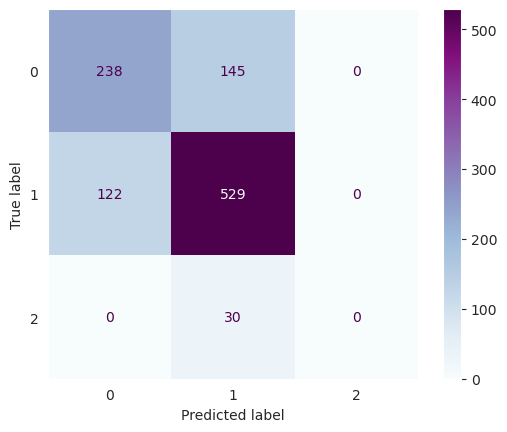

In [97]:
ConfusionMatrixDisplay(confusion_matrix(y_test_data, predictions)).plot(cmap='BuPu')

#### 3. Accuracy Score (not useful with imbalanced classes)

In [98]:
accuracy_score(y_test_data, predictions)

0.7208646616541353

#### 4. Cohen-Kappa Score (better for imbalanced classes)

A measure of classifier performance compared to a random-guessing model, especially good for an imbalanced data set (0-1, higher is better)


Resources:
- https://analyticsindiamag.com/understanding-cohens-kappa-score-with-hands-on-implementation/
- https://www.knime.com/blog/cohens-kappa-an-overview



In [99]:
cohen_kappa_score(y_test_data, predictions)

0.4103360253175895

Result: Moderate agreement = 0.40 to 0.60

## Multiple ML models in a function

### import more modules

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### from unsuccessful attempts to read exception (scikit warning) message to write to results ##
import warnings
import logging
import traceback
import sys
from sklearn.exceptions import ConvergenceWarning

### Function description

This function cycles through a list of models and runs them on x and y training and testing data inputs.
- Logistic Regression (with various solvers)
- Decision Tree Classifier
- K-Nearest Neighbors Classifier (does not use a training set)
- Support Vector Machine [LinearSVC()]
- Naive Bayes [GaussianNB()]
- Linear Discriminant Analysis
- Random Forest
- MLP Classifier

It outputs the models' scores on various tests:
- Accuracy Score - the percentage of predictions that were correct (not good for imbalanced data)
- Cohen Kappa - 
- Precision - correct positives
- F1 Score - score combining precision (correct positives) and recall (sensitivity)
- maybe (roc_auc_score) #TODO


### Function

Warnings
- Warnings are usually written to https://docs.python.org/3/library/sys.html#sys.stderr file objects/streams. "To write or read binary data from/to the standard streams, use the underlying binary buffer object. For example, to write bytes to stdout, use sys.stdout.buffer.write(b'abc')."

- class warnings.catch_warnings(*, record=False, module=None, action=None, category=Warning, lineno=0, append=False)
A context manager that copies and, upon exit, restores the warnings filter and the showwarning() function. 
If record is True, a list is returned that is progressively populated with objects as seen by a custom showwarning() function (which also suppresses output to sys.stdout). 
Each object in the list has attributes with the same names as the arguments to showwarning(). https://docs.python.org/3/library/warnings.html
    - so maybe need to get length of a list and extract the -1th item. except, when i print there is no list.
    - is it possible to use the 'action' do do this as well? lambda?

- https://docs.python.org/3/library/logging.html
- can possibly also use this but it uses with and assert and i don't know them https://docs.python.org/3/library/warnings.html#testing-warnings
- https://docs.python.org/3/library/traceback.html and https://stackoverflow.com/questions/8238360/how-to-save-traceback-sys-exc-info-values-in-a-variable but uses try which i don't know and can't make work in a loop 
    -"the problem with ipython or jupyter notebook env is that it has %tb magic which saves the traceback and makes it available at any point later. And as a result any locals() in all frames participating in the traceback will not be freed until the notebook exits or another exception will overwrite the previously stored backtrace. This is very problematic. It should not store the traceback w/o cleaning its frames. Fix submitted here." https://stackoverflow.com/questions/8238360/how-to-save-traceback-sys-exc-info-values-in-a-variable

In [101]:
# df_warnings = pd.DataFrame()

# lrlow = LogisticRegression(max_iter=50)

# with warnings.catch_warnings():
#     warnings.filterwarnings(category=ConvergenceWarning, action='always')
#     try:
#         lrlow.fit(x_data, y_data)
#     except Warning:
#         #df_warnings.append...
#         print('Did not converge')

In [102]:
#instantiate all models with any parameters needed
lr = LogisticRegression(solver='lbfgs', max_iter=3000)  #NB: 'lbfgs' is the default solver. it failed to converge, so trying various solvers
lr1 = LogisticRegression(solver='liblinear', max_iter=3000)
lr2 = LogisticRegression(solver='newton-cg', max_iter=3000)
lr3 = LogisticRegression(solver='newton-cholesky', max_iter=3000)
lr4 = LogisticRegression(solver='sag', max_iter=3000)   #NB: sag requires normalisation to work
lr5 = LogisticRegression(solver='saga', max_iter=3000)  #NB:saga requires normalisation
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
ls = LinearSVC(dual = True, max_iter=3000)
nb = GaussianNB()
ld = LDA(n_components=1)
rf = RandomForestClassifier()
mp = MLPClassifier()
#TODO: nn = sklearn.neural_network

#create list of all model instances
classifier_model_defs = [lr, lr1, lr5, dt, kn, ls, nb, ld, rf, mp] ## not used: lr2, lr3, lr4, nn

#warnings.filterwarnings('always', category=ConvergenceWarning)

#define function
def deploy_models(x_training_data, x_test_data, y_training_data, y_test_data): #feed in all inputs needed by models here  
    df_models_eval = pd.DataFrame(columns=['Model', 'Accuracy Score', 'Cohen Kappa', 'Precision', 'Precision: high', 'F1 Score', 'F1 Score: high']) # ,'Warning' #make a df to hold the scores
    for model in classifier_model_defs:             #loop over models in list
        model.fit(x_training_data, y_training_data) #use fit() to train each model on the x and y training data
        pred = model.predict(x_test_data)           #predict, evaluate and output some things to compare...
        acc = accuracy_score(y_test_data, pred)
        kap = cohen_kappa_score(y_test_data, pred)
        prc = precision_score(y_test_data, pred, average='weighted', zero_division=0)
        prc2 = precision_score(y_test_data, pred, average='weighted', zero_division=0, labels=[2]) 
        f1 = f1_score(y_test_data, pred, average='weighted', zero_division=0) 
        f12 = f1_score(y_test_data, pred, labels=[2], average='weighted', zero_division=0)# , labels=[2] to just show high quality
        #warn = 0 #sys.exc_info() #logging.LogRecord.getMessage() #traceback.extract_stack() #logging.Formatter(traceback.print_stack()) 
        #warnings.catch_warnings(,ConvergenceWarning) #sys.unraisablehook.err_msg #sys.stderr #logging.captureWarnings() 
        # #warnings.filterwarnings(action='ignore') 
        ## TODO: want to add error type so i can see which ones did not complete (ie Converge, so far)
        #print(warn)
        df_models_eval.loc[len(df_models_eval)] = [model, acc, kap, prc, prc2, f1, f12] #,warn #add row to the results df
        #print('\n', model, 'accuracy:', acc, 'kappa:', kap, 'f1:', f1) #test:print result per iteration (for when loop fails to finish and display df)
    return(df_models_eval)

#call function and save un-engineered test results to variable for comparison
orig_results = deploy_models(x_training_data, x_test_data, y_training_data, y_test_data)

display(orig_results)

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.716165,0.398906,0.692765,0.000000,0.703271,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.732143,0.429021,0.708343,0.000000,0.718194,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.718985,0.397935,0.694813,0.000000,0.704100,0.000000
3,DecisionTreeClassifier(),0.615602,0.237768,0.624141,0.093023,0.619636,0.109589
4,KNeighborsClassifier(),0.636278,0.227523,0.612339,0.000000,0.622866,0.000000
5,LinearSVC(max_iter=3000),0.545113,0.206846,0.665134,0.000000,0.519474,0.000000
6,GaussianNB(),0.601504,0.217438,0.615932,0.103448,0.608152,0.136364
7,LinearDiscriminantAnalysis(n_components=1),0.721805,0.412615,0.698718,0.000000,0.709353,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.738722,0.449609,0.730086,0.500000,0.727771,0.062500
9,MLPClassifier(),0.730263,0.407678,0.708516,0.000000,0.710398,0.000000


#### Test models also on their ability to predict color (type)

In [103]:
#test models on color as well

#define dfs for x and y
y_data_col = wines_clean['color_cat']
x_data_col = wines_clean.drop(['color_cat', 'quality_label', 'quality', 'color', 'index', 'is_red', 'is_white'], axis = 1) 

#split training data
x_training_data_col, x_test_data_col, y_training_data_col, y_test_data_col = train_test_split(x_data_col, y_data_col, test_size = 0.2)

deploy_models(x_training_data_col, x_test_data_col, y_training_data_col, y_test_data_col)

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.984023,0.957132,0.984155,0.0,0.983890,0.0
1,"LogisticRegression(max_iter=3000, solver='libl...",0.981203,0.949754,0.981198,0.0,0.981084,0.0
2,"LogisticRegression(max_iter=3000, solver='saga')",0.964286,0.903819,0.964136,0.0,0.963919,0.0
3,DecisionTreeClassifier(),0.970865,0.922598,0.970740,0.0,0.970774,0.0
4,KNeighborsClassifier(),0.935150,0.822480,0.934511,0.0,0.933892,0.0
5,LinearSVC(max_iter=3000),0.973684,0.928416,0.974218,0.0,0.973268,0.0
6,GaussianNB(),0.978383,0.942854,0.978359,0.0,0.978370,0.0
7,LinearDiscriminantAnalysis(n_components=1),0.994361,0.985037,0.994370,0.0,0.994347,0.0
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.995301,0.987516,0.995330,0.0,0.995286,0.0
9,MLPClassifier(),0.984962,0.959804,0.985006,0.0,0.984868,0.0


## Feature Engineering

### 1. Feature reduction (round 1)

Goal: drop highly correlated features and drop features that do not help in the prediction.

Resource: https://machinelearningmastery.com/calculate-feature-importance-with-python/

#### Feature importance

Feature: 0, Score: -1.25858
Feature: 1, Score: -7.67151
Feature: 2, Score: 0.70605
Feature: 3, Score: 0.13055
Feature: 4, Score: -2.56912
Feature: 5, Score: -0.04828
Feature: 6, Score: 0.05840
Feature: 7, Score: -0.23117
Feature: 8, Score: -5.61695
Feature: 9, Score: -6.43050
Feature: 10, Score: 0.48703
Feature: 11, Score: 0.41974


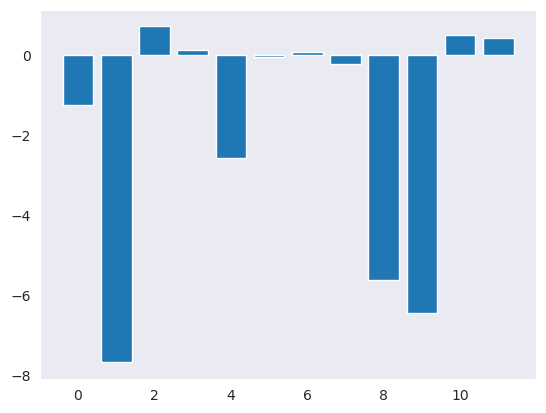

In [104]:
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Tests with removed (dropped) features

##### 1. Remove free_sulfur_dioxide, density, pH and residual_sugar 

In [105]:
#remove free_sulfur_dioxide, density (strongly correlated to other vars). remove pH and residual_sugar (weakly corellated with target)

#define dfs for x and y
y_data = wines_clean['quality_label_cat']
x_data1 = wines_clean.drop(['quality_label_cat', 'pH', 'free_sulfur_dioxide', 'density', 'residual_sugar', 'color_cat', 'quality_label', 'quality', 'color', 'index'], axis = 1) 

#split training data
x_training_data1, x_test_data1, y_training_data1, y_test_data1 = train_test_split(x_data1, y_data, test_size = 0.2)

In [106]:
#call function to test refined dataset
dropped_all = deploy_models(x_training_data1, x_test_data1, y_training_data1, y_test_data1)
display('Dropped all:', dropped_all, dropped_all.mean())
#compare to unmodified
display('None dropped:', orig_results, orig_results.mean())

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/tmp/ipykernel_40457/3230836472.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display('Dropped all:', dropped_all, dropped_all.mean())


'Dropped all:'

,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.727444,0.422363,0.708125,0.000000,0.714945,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.733083,0.430733,0.714254,0.000000,0.719404,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.731203,0.423597,0.712884,0.000000,0.716344,0.000000
3,DecisionTreeClassifier(),0.625000,0.253681,0.630566,0.034483,0.627579,0.037736
4,KNeighborsClassifier(),0.640977,0.241056,0.621404,0.000000,0.628676,0.000000
5,LinearSVC(max_iter=3000),0.473684,0.108792,0.643313,0.000000,0.409431,0.000000
6,GaussianNB(),0.662594,0.293328,0.656370,0.090909,0.654796,0.086957
7,LinearDiscriminantAnalysis(n_components=1),0.732143,0.431556,0.712978,0.000000,0.719426,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.747180,0.473682,0.740316,0.500000,0.738760,0.076923
9,MLPClassifier(),0.721805,0.416701,0.702825,0.000000,0.711177,0.000000


Accuracy Score     0.679511
Cohen Kappa        0.349549
Precision          0.684304
Precision: high    0.062539
F1 Score           0.664054
F1 Score: high     0.020162
dtype: float64

/tmp/ipykernel_40457/3230836472.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display('None dropped:', orig_results, orig_results.mean())


'None dropped:'

,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.716165,0.398906,0.692765,0.000000,0.703271,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.732143,0.429021,0.708343,0.000000,0.718194,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.718985,0.397935,0.694813,0.000000,0.704100,0.000000
3,DecisionTreeClassifier(),0.615602,0.237768,0.624141,0.093023,0.619636,0.109589
4,KNeighborsClassifier(),0.636278,0.227523,0.612339,0.000000,0.622866,0.000000
5,LinearSVC(max_iter=3000),0.545113,0.206846,0.665134,0.000000,0.519474,0.000000
6,GaussianNB(),0.601504,0.217438,0.615932,0.103448,0.608152,0.136364
7,LinearDiscriminantAnalysis(n_components=1),0.721805,0.412615,0.698718,0.000000,0.709353,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.738722,0.449609,0.730086,0.500000,0.727771,0.062500
9,MLPClassifier(),0.730263,0.407678,0.708516,0.000000,0.710398,0.000000


Accuracy Score     0.675658
Cohen Kappa        0.338534
Precision          0.675079
Precision: high    0.069647
F1 Score           0.664321
F1 Score: high     0.030845
dtype: float64

the models actually performed worse on average

##### 2. Remove only pH and residual_sugar (weakly correlated with target)


In [107]:
#define dfs for x and y
y_data = wines_clean['quality_label_cat']
x_data2 = wines_clean.drop(['quality_label_cat', 'pH','residual_sugar', 'color_cat', 'quality_label', 'quality', 'color', 'index'], axis = 1) 

#split training data
x_training_data2, x_test_data2, y_training_data2, y_test_data2 = train_test_split(x_data, y_data, test_size = 0.2, random_state=4)

#call function to test refined dataset
drop_ph_sugar = deploy_models(x_training_data2, x_test_data2, y_training_data2, y_test_data2)

#compare test results (average of all models)
display(drop_ph_sugar.mean(), 'None dropped:', orig_results.mean())

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/tmp/ipykernel_40457/944908654.py:12: FutureWarning: The default value of

Accuracy Score     0.685056
Cohen Kappa        0.346417
Precision          0.675573
Precision: high    0.068453
F1 Score           0.674455
F1 Score: high     0.028842
dtype: float64

'None dropped:'

Accuracy Score     0.675658
Cohen Kappa        0.338534
Precision          0.675079
Precision: high    0.069647
F1 Score           0.664321
F1 Score: high     0.030845
dtype: float64

no large changes, but prediction of 'high' target seems better

##### 3. Remove only free_sulfur_dioxide and density (strongly correlated to other vars, possibly redundant)


In [108]:
#define dfs for x and y
y_data = wines_clean['quality_label_cat']
x_data3 = wines_clean.drop(['quality_label_cat', 'free_sulfur_dioxide', 'density',  'color_cat', 'quality_label', 'quality', 'color', 'index'], axis = 1) 

#split training data
x_training_data3, x_test_data3, y_training_data3, y_test_data3 = train_test_split(x_data3, y_data, test_size = 0.2, random_state=4)

deploy_models(x_training_data3, x_test_data3, y_training_data3, y_test_data3)

#call function to test refined dataset
drop_so2_density = deploy_models(x_training_data3, x_test_data3, y_training_data3, y_test_data3)

#compare test results (average of all models)
display(drop_so2_density, drop_so2_density.mean(), orig_results, orig_results.mean())

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.730263,0.426173,0.706535,0.000000,0.716636,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.721805,0.405483,0.697772,0.000000,0.707392,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.728383,0.420715,0.704417,0.000000,0.714290,0.000000
3,DecisionTreeClassifier(),0.636278,0.287375,0.648202,0.128205,0.640833,0.144928
4,KNeighborsClassifier(),0.661654,0.286796,0.639745,0.000000,0.649925,0.000000
5,LinearSVC(max_iter=3000),0.419173,0.061980,0.658286,0.000000,0.320726,0.000000
6,GaussianNB(),0.638158,0.240365,0.622919,0.090909,0.628979,0.048780
7,LinearDiscriminantAnalysis(n_components=1),0.728383,0.421591,0.704590,0.000000,0.714592,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.745301,0.464803,0.736855,0.500000,0.734649,0.062500
9,MLPClassifier(),0.677632,0.244168,0.668133,0.000000,0.629941,0.000000


Accuracy Score     0.668703
Cohen Kappa        0.325945
Precision          0.678745
Precision: high    0.071911
F1 Score           0.645796
F1 Score: high     0.025621
dtype: float64

,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.716165,0.398906,0.692765,0.000000,0.703271,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.732143,0.429021,0.708343,0.000000,0.718194,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.718985,0.397935,0.694813,0.000000,0.704100,0.000000
3,DecisionTreeClassifier(),0.615602,0.237768,0.624141,0.093023,0.619636,0.109589
4,KNeighborsClassifier(),0.636278,0.227523,0.612339,0.000000,0.622866,0.000000
5,LinearSVC(max_iter=3000),0.545113,0.206846,0.665134,0.000000,0.519474,0.000000
6,GaussianNB(),0.601504,0.217438,0.615932,0.103448,0.608152,0.136364
7,LinearDiscriminantAnalysis(n_components=1),0.721805,0.412615,0.698718,0.000000,0.709353,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.738722,0.449609,0.730086,0.500000,0.727771,0.062500
9,MLPClassifier(),0.730263,0.407678,0.708516,0.000000,0.710398,0.000000


Accuracy Score     0.675658
Cohen Kappa        0.338534
Precision          0.675079
Precision: high    0.069647
F1 Score           0.664321
F1 Score: high     0.030845
dtype: float64

slight improvement

### 2. Feature scaling 
Note: should be done after splitting to prevent data leakage

In [109]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [110]:
## fit scaler on training data eg MinMax and save to a descriptively named variable eg norm/stand..
# norm = MinMaxScaler().fit(X_train)

## transform training data
# X_train_norm = norm.transform(X_train)

## transform testing data
# X_test_norm = norm.transform(X_test)

#### Normalisation (test)

In [111]:
# fit scaler on training data
norm = MinMaxScaler().fit(x_training_data)

# transform training data
x_training_norm = norm.transform(x_training_data)

# transform testing data
x_test_norm = norm.transform(x_test_data)

# show normalised df
#display(pd.DataFrame(x_test_norm))

# run these through the testing function
norm_results = deploy_models(x_training_norm, x_test_norm, y_training_data, y_test_data)
display('After normalisation with MinMaxScaler: ', norm_results)
# compare to original
display('Unmodified: ', orig_results)

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'After normalisation with MinMaxScaler: '

,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.727444,0.422211,0.703942,0.000000,0.714369,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.726504,0.420510,0.703045,0.000000,0.713508,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.727444,0.422211,0.703942,0.000000,0.714369,0.000000
3,DecisionTreeClassifier(),0.600564,0.212986,0.612207,0.044444,0.605971,0.053333
4,KNeighborsClassifier(),0.710526,0.397506,0.692863,0.000000,0.701420,0.000000
5,LinearSVC(max_iter=3000),0.727444,0.422791,0.704027,0.000000,0.714522,0.000000
6,GaussianNB(),0.587406,0.205315,0.610401,0.098592,0.597562,0.138614
7,LinearDiscriminantAnalysis(n_components=1),0.721805,0.412615,0.698718,0.000000,0.709353,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.748120,0.470464,0.739602,0.500000,0.737391,0.062500
9,MLPClassifier(),0.747180,0.474080,0.725824,0.000000,0.736341,0.000000


'Unmodified: '

,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.716165,0.398906,0.692765,0.000000,0.703271,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.732143,0.429021,0.708343,0.000000,0.718194,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.718985,0.397935,0.694813,0.000000,0.704100,0.000000
3,DecisionTreeClassifier(),0.615602,0.237768,0.624141,0.093023,0.619636,0.109589
4,KNeighborsClassifier(),0.636278,0.227523,0.612339,0.000000,0.622866,0.000000
5,LinearSVC(max_iter=3000),0.545113,0.206846,0.665134,0.000000,0.519474,0.000000
6,GaussianNB(),0.601504,0.217438,0.615932,0.103448,0.608152,0.136364
7,LinearDiscriminantAnalysis(n_components=1),0.721805,0.412615,0.698718,0.000000,0.709353,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.738722,0.449609,0.730086,0.500000,0.727771,0.062500
9,MLPClassifier(),0.730263,0.407678,0.708516,0.000000,0.710398,0.000000


#### Standardisation with RobustScaler (test)

In [112]:
# StandardScaler: doesn't work correctly in the presence of outliers.
# RobustScaler: uses 1st and 3rd quantiles so is better for outliers.

# fit scaler on training data
robust = RobustScaler().fit(x_training_data)

# transform training data
x_training_robust = robust.transform(x_training_data)

# transform testing data
x_test_robust = robust.transform(x_test_data)

# run these through the testing function
robust_results = deploy_models(x_training_robust, x_test_robust, y_training_data, y_test_data)
display('After standardisation with RobustScaler: ', robust_results)
# compare to original
display('Unmodified: ', orig_results)

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'After standardisation with RobustScaler: '

,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.728383,0.425645,0.705102,0.000000,0.715684,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.726504,0.421090,0.703134,0.000000,0.713660,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.728383,0.425645,0.705102,0.000000,0.715684,0.000000
3,DecisionTreeClassifier(),0.612782,0.233957,0.622156,0.130435,0.617127,0.157895
4,KNeighborsClassifier(),0.700188,0.373421,0.681427,0.000000,0.690365,0.000000
5,LinearSVC(max_iter=3000),0.727444,0.422791,0.704027,0.000000,0.714522,0.000000
6,GaussianNB(),0.587406,0.205315,0.610401,0.098592,0.597562,0.138614
7,LinearDiscriminantAnalysis(n_components=1),0.721805,0.412615,0.698718,0.000000,0.709353,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.746241,0.465448,0.737565,0.500000,0.735262,0.062500
9,MLPClassifier(),0.742481,0.468575,0.723415,0.000000,0.732741,0.000000


'Unmodified: '

,Model,Accuracy Score,Cohen Kappa,Precision,Precision: high,F1 Score,F1 Score: high
0,LogisticRegression(max_iter=3000),0.716165,0.398906,0.692765,0.000000,0.703271,0.000000
1,"LogisticRegression(max_iter=3000, solver='libl...",0.732143,0.429021,0.708343,0.000000,0.718194,0.000000
2,"LogisticRegression(max_iter=3000, solver='saga')",0.718985,0.397935,0.694813,0.000000,0.704100,0.000000
3,DecisionTreeClassifier(),0.615602,0.237768,0.624141,0.093023,0.619636,0.109589
4,KNeighborsClassifier(),0.636278,0.227523,0.612339,0.000000,0.622866,0.000000
5,LinearSVC(max_iter=3000),0.545113,0.206846,0.665134,0.000000,0.519474,0.000000
6,GaussianNB(),0.601504,0.217438,0.615932,0.103448,0.608152,0.136364
7,LinearDiscriminantAnalysis(n_components=1),0.721805,0.412615,0.698718,0.000000,0.709353,0.000000
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.738722,0.449609,0.730086,0.500000,0.727771,0.062500
9,MLPClassifier(),0.730263,0.407678,0.708516,0.000000,0.710398,0.000000


## 2. Parameter tuning and model improvement 

### Run k-Fold cross-validation on all models

In [113]:
#make new df of un-split chosen features only, outliers removed
wines_dropped_no_outliers = wines_clean.drop(['index', 'quality', 'color', 'color_cat', 'free_sulfur_dioxide','density', 'quality_label'], axis = 1)

#make new x and y data
y_data_dno = wines_dropped_no_outliers['quality_label_cat']
x_data_dno = wines_dropped_no_outliers.drop(['quality_label_cat'], axis = 1) 

display(x_data_dno)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulfates,alcohol,is_red,is_white
0,7.8,0.88,0.00,2.6,0.098,67.0,3.20,0.68,9.8,1.0,0.0
1,7.8,0.76,0.04,2.3,0.092,54.0,3.26,0.65,9.8,1.0,0.0
2,9.8,0.28,0.56,1.9,0.075,60.0,3.16,0.58,9.8,1.0,0.0
3,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,40.0,3.51,0.56,9.4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,92.0,3.27,0.50,11.2,0.0,1.0
5316,6.6,0.32,0.36,8.0,0.047,168.0,3.15,0.46,9.6,0.0,1.0
5317,6.5,0.24,0.19,1.2,0.041,111.0,2.99,0.46,9.4,0.0,1.0
5318,5.6,0.29,0.30,1.1,0.028,110.0,3.34,0.38,12.8,0.0,1.0


In [114]:
#use the scikit-learn method cross_val_score (NB- not the same as cross_validate)
from sklearn.model_selection import cross_val_score, KFold

#set up a K-Fold with 5 folds
kf = KFold(n_splits=5, random_state=None)

#make a df to hold the fold scores and average
kfold_scores = pd.DataFrame(columns=['Model', 'Fold 1','Fold 2','Fold 3','Fold 4','Fold 5', 'Average Accuracy'])

#loop over models, use data with dropped features (x_data1) and RobustScaler for Standardisation- ### TODO: is this scaling in the right order, or should it be done after fold split?
for model in classifier_model_defs:
    result = cross_val_score(model, x_data_dno, y_data_dno, cv = kf)  
    kfold_scores.loc[len(kfold_scores)] = [model, result[0], result[1], result[2], result[3], result[4], result.mean()]
    #print(model, "Per fold:".format(result), "Avg accuracy: {:.4f}".format(result.mean()))

display(kfold_scores)

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

,Model,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Average Accuracy
0,LogisticRegression(max_iter=3000),0.712406,0.673872,0.682331,0.725564,0.760338,0.710902
1,"LogisticRegression(max_iter=3000, solver='libl...",0.708647,0.672932,0.674812,0.728383,0.763158,0.709586
2,"LogisticRegression(max_iter=3000, solver='saga')",0.705827,0.660714,0.659774,0.730263,0.755639,0.702444
3,DecisionTreeClassifier(),0.566729,0.592105,0.595865,0.583647,0.631579,0.593985
4,KNeighborsClassifier(),0.568609,0.588346,0.594925,0.647556,0.667293,0.613346
5,LinearSVC(max_iter=3000),0.641917,0.355263,0.601504,0.505639,0.713346,0.563534
6,GaussianNB(),0.466165,0.637218,0.612782,0.655075,0.540414,0.582331
7,LinearDiscriminantAnalysis(n_components=1),0.718045,0.671992,0.673872,0.724624,0.765977,0.710902
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.693609,0.684211,0.703947,0.720865,0.741541,0.708835
9,MLPClassifier(),0.670113,0.657895,0.612782,0.690789,0.780075,0.682331


### Use pipeline to apply normalisation after K-fold splits, using RandomForest

Because sklearn's K-Fold splits the data for us, we cannot easily apply standardisation or nomalisation to each of the folds. Doind it before splitting is not advised becasue of data leakage. To do this, I need to use pipeline. (This will also be needed for gridsearch later.)

Pipeline is a list of transformations and callable names (as tuples), always ending with am estimator. make_pipeline allows us to omit the names.

The pipeline can then be called used in place of the model in fit() and predict().

Try out pipeline:

In [115]:
from sklearn.pipeline import Pipeline, make_pipeline

#set up pipeline with robustscaler and randomforest
pipeline = Pipeline(steps=[('scaler', RobustScaler()),
                   ('model', RandomForestClassifier(random_state=42))])


In [116]:
#attempt 1, try using pipeline only, without kfold

#first, get new train test data as not using kfold
X_train, X_test, y_train, y_test = train_test_split(x_data_dno, y_data_dno, test_size=0.25, random_state=42)

#use pipeline to fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

#show F1 score
score = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f'F1-score: {score}')

F1-score: 0.7232063361763738


In [117]:
#attempt 3, pipeline and kfold https://stackoverflow.com/questions/44446501/how-to-standardize-data-with-sklearns-cross-val-score
scores = cross_val_score(pipeline, x_data_dno, y_data_dno, cv = kf) #remember, kf is the kfold variable made above
print(scores, 'mean: ', scores.mean())

[0.68890977 0.68327068 0.69454887 0.71428571 0.75      ] mean:  0.706203007518797


In [133]:
#attempt 4, put the pipeline in the loop and try various scalers on various models
                       
#make a df for scaled data to hold the scores
kfold_scores_scaled = pd.DataFrame(columns=['Model', 'Scaler/Normaliser', 'Average Accuracy'])
from sklearn.preprocessing import MaxAbsScaler, QuantileTransformer, PowerTransformer, Normalizer

#list scalers
scaler_list = [MinMaxScaler(), MaxAbsScaler(),StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer(), PowerTransformer()]

#nested loop over models/scalers
for model in classifier_model_defs:
    for scaler in scaler_list:
        pipeline2 = make_pipeline(scaler, model)
        result = cross_val_score(pipeline2, x_data_dno, y_data_dno, cv = kf)  
        kfold_scores_scaled.loc[len(kfold_scores_scaled)] = [model, scaler, result.mean()]
        #print(model, scaler, "Per fold:".format(result[0]), "Avg accuracy: {:.4f}".format(result.mean()))

display(kfold_scores_scaled)

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

,Model,Scaler/Normaliser,Average Accuracy
0,LogisticRegression(max_iter=3000),MinMaxScaler(),0.712030
1,LogisticRegression(max_iter=3000),MaxAbsScaler(),0.708835
2,LogisticRegression(max_iter=3000),StandardScaler(),0.712970
3,LogisticRegression(max_iter=3000),RobustScaler(),0.712406
4,LogisticRegression(max_iter=3000),Normalizer(),0.585714
...,...,...,...
65,MLPClassifier(),StandardScaler(),0.711842
66,MLPClassifier(),RobustScaler(),0.712030
67,MLPClassifier(),Normalizer(),0.645865
68,MLPClassifier(),QuantileTransformer(),0.717857


In [135]:
#display whole table in order of accuracy

pd.set_option('display.max_rows',500)
display(kfold_scores_scaled.sort_values(by=['Average Accuracy'], ascending=False))

,Model,Scaler/Normaliser,Average Accuracy
68,MLPClassifier(),QuantileTransformer(),0.717857
63,MLPClassifier(),MinMaxScaler(),0.715977
64,MLPClassifier(),MaxAbsScaler(),0.715038
41,LinearSVC(max_iter=3000),PowerTransformer(),0.713722
57,"(DecisionTreeClassifier(max_features='sqrt', r...",MaxAbsScaler(),0.713722
13,"LogisticRegression(max_iter=3000, solver='libl...",PowerTransformer(),0.713722
61,"(DecisionTreeClassifier(max_features='sqrt', r...",QuantileTransformer(),0.713534
10,"LogisticRegression(max_iter=3000, solver='libl...",RobustScaler(),0.713534
9,"LogisticRegression(max_iter=3000, solver='libl...",StandardScaler(),0.713346
20,"LogisticRegression(max_iter=3000, solver='saga')",PowerTransformer(),0.713158


### 2. Tuning MLP and RandomForest with GridSearchCV and RandomizedSearchCV

In [120]:
#Automate the finding the best parameters using GridSearchCV and RandomizedSearchCV
#these use cross-validation (CV) to estimate the model’s performance in a “parameter space” (range of possible values)

#### 1.MLP

In [124]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) 

print('Best parameters found:\n', clf.best_params_)

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  war

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

#### 2. Random Forest

In [136]:
#TODO

### More evaluation metric tests

Classification Reports and Confusion Matrices

In [121]:
#TODO: these are not appropriate evaluation metrics and/or they are not set up right. find better ones there i can see per-target, per-model

# for model in classifier_model_defs:
#     predictions = model.predict(x_test_data)
#     #print(classification_report(y_test_data, predictions))
#     #ConfusionMatrixDisplay(confusion_matrix(y_test_data, predictions)).plot(cmap='BuPu') #add model title

ideas next:
- loop with kfold to evaluate parameters? https://machinelearningmastery.com/random-forest-ensemble-in-python/
- loop over different datasets with dropped features?
- graph model performance?


# Graphs for presentation

data with and without outliers and redundant features:

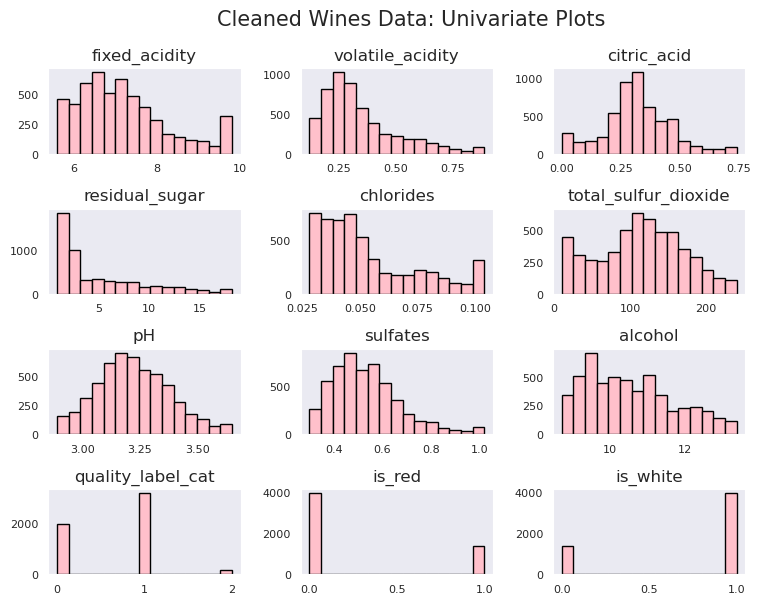

In [122]:
sns.set_style(style='dark')
wines_dropped_no_outliers.hist(bins=15, color='pink', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Cleaned Wines Data: Univariate Plots', x=0.65, y=1.25, fontsize=15)

              precision    recall  f1-score   support

           0       0.70      0.63      0.67       504
           1       0.75      0.83      0.79       794
           2       0.00      0.00      0.00        32

    accuracy                           0.73      1330
   macro avg       0.48      0.49      0.48      1330
weighted avg       0.72      0.73      0.72      1330



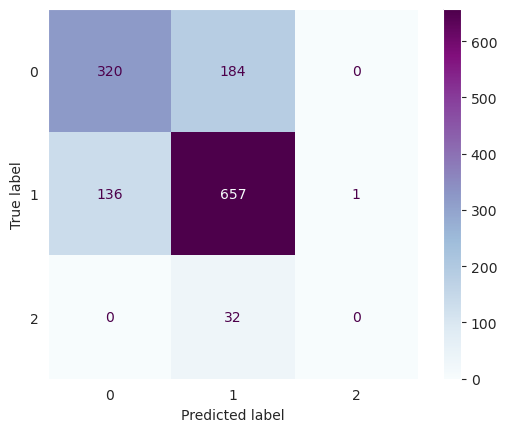

In [123]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='BuPu')

print(classification_report(y_test, y_pred))